In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1fLuRn7BLw_Mz_AbzAaYVt3D336RSRRvK

Downloading...
From: https://drive.google.com/uc?id=1fLuRn7BLw_Mz_AbzAaYVt3D336RSRRvK
To: c:\Users\Lenovo\OneDrive\Documents\Python\CodingWise\ML\cars24-car-price-clean(YScaled_MaxMin).csv

  0%|          | 0.00/4.19M [00:00<?, ?B/s]
 13%|█▎        | 524k/4.19M [00:00<00:01, 2.79MB/s]
 50%|█████     | 2.10M/4.19M [00:00<00:00, 7.68MB/s]
100%|██████████| 4.19M/4.19M [00:00<00:00, 10.9MB/s]


## Multivariate Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('cars24-car-price-clean(YScaled_MaxMin).csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.184371,0.042522,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.207231,0.225975,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.207231,0.120277,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.184371,0.093549,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.224624,0.300085,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Removing the selling price and taking rest of the features in X

In [5]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

Convert X and Y from dataframes to numpy array

In [6]:
X = X.to_numpy()
Y = Y.to_numpy()

Calculating Mu, standard deviation & performing standardization

In [7]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

X = (X-u)/std

In [8]:
print(X.shape, Y.shape)

(19820, 17) (19820,)


Adding $x_0$ feature to X

In [10]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(19820, 19)


In [11]:
def hypothesis(X,weight):
    return np.dot(X,weight)

In [12]:
def error(X,y,weight):                      # MSE error function
    e = 0.0
    m = X.shape[0]
    y_hat = hypothesis(X,weight)
    e = np.sum((y-y_hat)**2)
    return e/m

In [13]:
def gradient(X,y,weight):
    
    y_hat = hypothesis(X,weight)
    grad = np.dot(X.T,(y_hat - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,epochs=500):
    
    n = X.shape[1]
    weight = np.zeros((n,))
    error_list = []
    
    for i in range(epochs):
        e = error(X,y,weight)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,weight)
        weight = weight - learning_rate*grad
        
    return weight, error_list

In [14]:
import time                                     # calculating time taken
start = time.time()
weight, error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  0.18565011024475098


In [15]:
print(weight)                                   # learnt parameters (weights)

[ 0.15254237  0.15254237  0.01528358 -0.00430307 -0.01137388  0.0071149
  0.00681522 -0.01528358  0.01446966  0.18654218 -0.00398817 -0.00080921
  0.00368586  0.00301192  0.00070946 -0.00493635 -0.00308501 -0.00442518
 -0.00615209]


## Plotting the error function

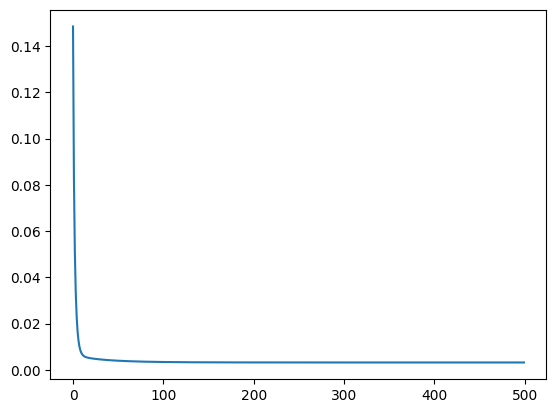

In [16]:
fig = plt.figure()
plt.plot(error_list)
plt.show()

In [17]:
Y_hat = hypothesis(X,weight)                    # predictions for X

In [18]:
def r2_score(y,y_):                             # calculating score
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [19]:
r2_score(Y,Y_hat)

np.float64(0.9421852544960344)

Above is the score calculated using all features (columns of data table)<br>
However, R_sq always seems to increase with addition of more features, be it relevent or irrelevent

Hence we calculate the Adjusted R_sq, everytime a new col is added, to check for accuracy

In [20]:
Adj_R = 1 - (1-r2_score(Y,Y_hat))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9421297756998437
